In [10]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")



## Q 1.3 Identify missing values

In [11]:
missing_value=[np.nan,"Unknown"] 
df= pd.read_csv("TaxiData.csv",na_values=missing_value)
df.isnull().sum()

pickup_community_area         2
fare                          0
trip_start_month              0
trip_start_hour               0
trip_start_day                0
trip_start_timestamp          0
pickup_latitude               2
pickup_longitude              2
dropoff_latitude            482
dropoff_longitude           482
trip_miles                    0
pickup_census_tract       15001
dropoff_census_tract       4241
payment_type                 29
company                    5140
trip_seconds                  6
dropoff_community_area      506
tips                          0
dtype: int64

Categorised unknown as a missing value  

<Axes: >

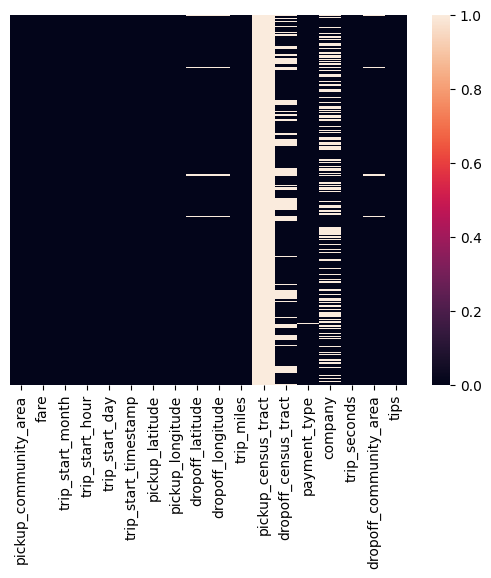

In [12]:
sns.heatmap(df.isnull(),yticklabels=False)

Columns (pickup_census_tract,dropoff_census_tract,company) have significant missing values 
And columns (dropoff_latitude, dropoff_longitude dropoff_community_area) also have some missing values 

In [13]:
df=df.drop('pickup_census_tract',axis=1)

## Q 1.1 Classify columns as categorical, numerical, or mixed data types

In [14]:
df.dropna(axis=1,how='all') # Removed only those values in which entire row is null
categorical_cols = []
numerical_cols = []
mixed_cols = []

for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        numerical_cols.append(col)
    #If column is of object type and all entries are strings
    elif pd.api.types.is_string_dtype(df[col]) and df[col].apply(lambda x: isinstance(x, str)).all():
        categorical_cols.append(col)
    else:
        mixed_cols.append(col)
print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)
print("Mixed-type columns:", mixed_cols)

Numerical columns: ['pickup_community_area', 'fare', 'trip_start_month', 'trip_start_hour', 'trip_start_day', 'trip_start_timestamp', 'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude', 'trip_miles', 'dropoff_census_tract', 'trip_seconds', 'dropoff_community_area', 'tips']
Categorical columns: []
Mixed-type columns: ['payment_type', 'company']


## 1.4 Handling missing values
On the numerical columns, We are using the interpolate method to fill the missing values 

<Axes: >

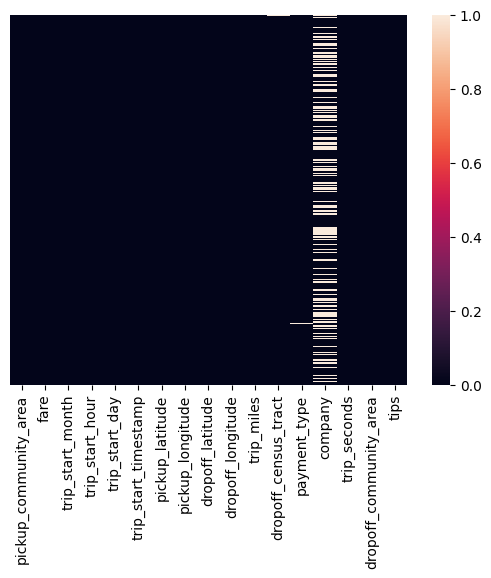

In [15]:

df[numerical_cols] = df[numerical_cols].interpolate()
sns.heatmap(df.isnull(),yticklabels=False)

'dropoff_census_tract', 'payment_type', 'company' 

For the above columns, we are using the ffill followed by bfill to fill the missing values 

<Axes: >

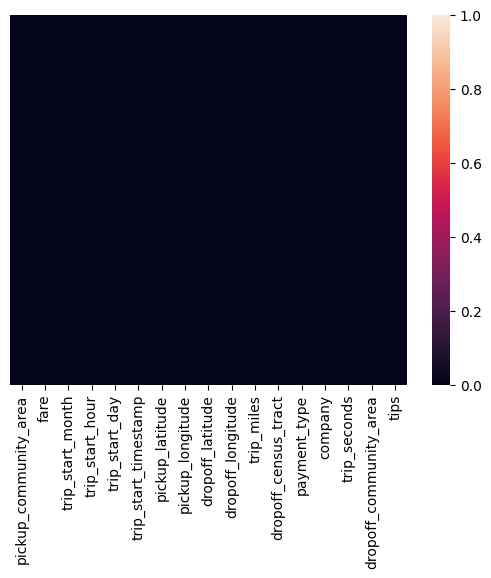

In [16]:
df[[ 'dropoff_census_tract', 'payment_type', 'company']] = df[['dropoff_census_tract', 'payment_type', 'company']].fillna(method='ffill').fillna(method='bfill')
sns.heatmap(df.isnull(),yticklabels=False)

# 1.4
'pickup_community_area', 'dropoff_community_area', 'pickup_latitude',	'pickup_longitude',	'dropoff_latitude','dropoff_longitude'

For the above columns during interpolation some head and tails missing value are not filled, So we used ffill followed by bfill to fill the missing values  

In [19]:
myDATA=[ 'pickup_community_area', 'dropoff_community_area', 'pickup_latitude',	'pickup_longitude',	'dropoff_latitude','dropoff_longitude']
df[myDATA] = df[myDATA].fillna(method='ffill').fillna(method='bfill')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15002 entries, 0 to 15001
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   pickup_community_area   15002 non-null  float64
 1   fare                    15002 non-null  float64
 2   trip_start_month        15002 non-null  int64  
 3   trip_start_hour         15002 non-null  int64  
 4   trip_start_day          15002 non-null  int64  
 5   trip_start_timestamp    15002 non-null  int64  
 6   pickup_latitude         15002 non-null  float64
 7   pickup_longitude        15002 non-null  float64
 8   dropoff_latitude        15002 non-null  float64
 9   dropoff_longitude       15002 non-null  float64
 10  trip_miles              15002 non-null  float64
 11  dropoff_census_tract    15002 non-null  float64
 12  payment_type            15002 non-null  object 
 13  company                 15002 non-null  object 
 14  trip_seconds            15002 non-null

## 1.2 Type conversion


In [18]:
categorical_cols = []
numerical_cols = []
mixed_cols = []

for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        numerical_cols.append(col)
    #If column is of object type and all entries are strings
    elif pd.api.types.is_string_dtype(df[col]) and df[col].apply(lambda x: isinstance(x, str)).all():
        categorical_cols.append(col)
    else:
        mixed_cols.append(col)
print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)
print("Mixed-type columns:", mixed_cols)

Numerical columns: ['pickup_community_area', 'fare', 'trip_start_month', 'trip_start_hour', 'trip_start_day', 'trip_start_timestamp', 'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude', 'trip_miles', 'dropoff_census_tract', 'trip_seconds', 'dropoff_community_area', 'tips']
Categorical columns: ['payment_type', 'company']
Mixed-type columns: []



Converted payment_type,comapany from Mixed to Categorial (because of missing values , they were in mixed values)

Since, the missing values are filled using ffill and bfill, Now they have only Categorical values 